# Numerical Studies of Quantum Entanglement

In this notebook, we will perform some numerical studies of multiple-particle quantum mechanics. It is assumed that you are familiar with the basics of using Python 1D arrays to represent vectors, and 2D arrays to represent matrices/operators. For a detailed discussion of some of the topics below, you may optionally refer to Appendix D (Numerical Tensor Products) in the course notes, but that is not necessary to complete this notebook.

## Numerical tensor products

Tensor products are implemented using the [`kron`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.kron.html) function from the `numpy` module.

### 1. Tensor products of vectors

Consider vectors $|a\rangle \in \mathscr{H}_A$ and $|b\rangle \in \mathscr{H}_B$, represented by 1D arrays `a` and `b`. Their tensor product is computed as follows:

> $|a\rangle \otimes |b\rangle \quad \leftrightarrow\quad$ `kron(a, b)`

The result is a 1D array of length $\mathrm{dim}(\mathscr{H}_A\otimes\mathscr{H}_B) = \mathrm{dim}(\mathscr{H}_A) \mathrm{dim}(\mathscr{H}_B)$. Note that $\mathscr{H}_A$ and $\mathscr{H}_B$ need not have the same dimensionality.

Here is an example:

In [1]:
import numpy as np

a   = np.array([2., -1.])     # vector in a 2D space
b   = np.array([1., 2., 3.])  # vector in a 3D space
psi = np.kron(a, b)           # vector in the 6D tensor product space

print(psi)

[ 2.  4.  6. -1. -2. -3.]


To verify the above example in bra-ket notation, let $\{|m\rangle, |n\rangle\}$ be the basis for space $\mathscr{H}_A$, and let $\{|p\rangle, |q\rangle, |r\rangle\}$ be the basis for space $\mathscr{H}_B$:

$$\begin{aligned}|a\rangle &= 2|m\rangle - |n\rangle \\ |b\rangle &= 1|p\rangle + 2|q\rangle + 3|r\rangle \\  \Rightarrow \;\; |a\rangle \otimes |b \rangle &= 2|m\rangle |p\rangle + 4|m\rangle |q\rangle + 6|m\rangle |r\rangle - |n\rangle |p\rangle -2 |n\rangle |q\rangle - 3|n\rangle |r\rangle \end{aligned}$$

Note that the basis vectors are in a specific order: `kron(a,b)` does NOT generally equal `kron(b,a)`.

In [2]:
foo = np.kron(b, a)  # This doesn't give the same result as kron(a, b)
print(foo)

[ 2. -1.  4. -2.  6. -3.]


### 2. Tensor products of arrays

Consider operators $\hat{O}_A$ and $\hat{O}_B$, whose matrix components are given by 2D arrays `OA` and `OB`. Their tensor product is computed as follows:

> $\hat{O}_A \otimes \hat{O}_B \quad\leftrightarrow\quad$ `kron(OA, OB)`.

This is a 2D array of size $\mathrm{dim}(\mathscr{H}_A\otimes\mathscr{H}_B) \, \times \, \mathrm{dim}(\mathscr{H}_A\otimes\mathscr{H}_B)$.

Here is an example to verify that

$$\Big(\hat{O}_A \otimes \hat{O}_B \Big) \Big(|\psi_A\rangle \otimes |\psi_B\rangle\Big) = \Big(\hat{O}_A |\psi_A\rangle\Big) \otimes \Big(\hat{O}_B |\psi_B\rangle\Big) $$

In [3]:
## Define new example vectors a and b, this time as complex arrays...
a  = np.array([2.+1j, 1j],     dtype=complex)
b  = np.array([-1j, 2., 1-1j], dtype=complex)

## Define two example operators (2D arrays), OA and OB:
OA = np.array([[2., 1.], [1j, 1.]], dtype=complex)
OB = np.array([[1., 2j, 3.], [0., 4., 0.], [1., 0., 1j]], dtype=complex)

O_total = np.kron(OA, OB)                     # Tensor product of OA and OB

OAa = np.dot(OA, a)                           # OA * a is a vector (1D array)
OBb = np.dot(OB, b)                           # OB * b is a vector (1D array)

print("LHS: ",  np.dot(O_total, np.kron(a, b)))  # LHS
print("RHS: ",  np.kron(OAa, OBb))               # RHS

LHS:  [12. +9.j 32.+24.j  4. +3.j -3. +9.j -8.+24.j -1. +3.j]
RHS:  [12. +9.j 32.+24.j  4. +3.j -3. +9.j -8.+24.j -1. +3.j]


## Task 1: Calculate measurement probabilities (5 marks)

As before, let Hilbert space $\mathscr{H}_A$ be spanned by $\{|m\rangle, |n\rangle\}$, and let Hilbert space $\mathscr{H}_B$ be spanned by $\{|p\rangle, |q\rangle, |r\rangle\}$. Consider the state

$$|\psi\rangle = \frac{1}{3} |m\rangle |p\rangle + \frac{1}{\sqrt{3}}|m\rangle|q\rangle + \frac{1}{3} |m\rangle |r\rangle + \frac{\sqrt{2}}{3} |n\rangle |q\rangle + \frac{\sqrt{2}}{3} |n\rangle |r\rangle.$$

Now consider measurements of the $A$ or $B$ observables whose eigenstates correspond to the above basis vectors. By using projection operators, compute the following measurement probabilities:

* Probability of result $m$ from measuring $A$
* Probability of result $n$ from measuring $A$
* Probability of result $p$ from measuring $B$
* Probability of result $q$ from measuring $B$
* Probability of result $r$ from measuring $B$

Note that you should *compute* the projection operators: don't just solve the problem analytically and write the answers directly into the code.

In [12]:
## Define the |m>, |n>, |p>, |q>, and |r> vectors as 1D arrays.
m = np.array([1., 0.], dtype=complex)
n = np.array([0., 1.], dtype=complex)
p = np.array([1., 0., 0.], dtype=complex)
q = np.array([0., 1., 0.], dtype=complex)
r = np.array([0., 0., 1.], dtype=complex)

## Insert the rest of the code here...

## The program outputs can be formatted like this:
# prob_A_m = 0.3
# print("Probability of result m from measuring A =", prob_A_m)

### Hints for Task 1

* To compute a matrix-vector product $\hat{Q} |v\rangle$, use the [`dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function: `np.dot(Q, v)`.

* To compute an inner product $\langle u|v\rangle$, use the [`dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function: `np.dot(u.conj(), v)`.  Note the complex conjugate on the bra (the first input).

* To compute an outer product $|u\rangle\langle v|$, use the [`outer`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html) function: `np.outer(u, v.conj())`. Note the complex conjugate on the bra (the second input).

* To generate an identity matrix, use the [`eye`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) function: e.g., `np.eye(2)`.

## Partial projections

Computing density matrices requires performing partial projections. There are two cases to worry about.

### 1. Left projections

A partial projection acting from the left can be implemented via the recipe

> $\quad \langle \alpha | \otimes \hat{O}_B \quad \leftrightarrow \quad$ `kron(alpha.conj(), OB)`

> $\quad \hat{O}_A \otimes \langle \beta| \quad\leftrightarrow \quad$ `kron(OA, beta.conj())`

For example, the code below verifies that

$$\Big(\langle \alpha | \otimes \hat{O}_B\Big) \Big(|a\rangle |b\rangle\Big) = \langle \alpha | a\rangle \Big(\hat{O}_B |b\rangle\Big) \;\;\in\;\;\mathscr{H}_B.$$

In [29]:
## Use a, b, OA, and OB from the previous example (defined in an above code cell).

alpha      = np.array([2+1j, 1-2j], dtype=complex)
alpha_x_OB = np.kron(alpha.conj(), OB)

print("LHS =",  np.dot(alpha_x_OB, np.kron(a, b)))         # LHS of the equation
print("RHS =",  np.dot(alpha.conj(), a) * np.dot(OB, b))   # RHS of the equation

LHS = [ 9.+3.j 24.+8.j  3.+1.j]
RHS = [ 9.+3.j 24.+8.j  3.+1.j]


### 2. Right projections

Partial projections acting from the right are a bit trickier. We won't go into details, but here are the recipes:

> $\quad |\alpha\rangle \otimes \hat{O}_B \quad \leftrightarrow \quad$ `kron(alpha, OB.T).T`

> $\quad \hat{O}_A \otimes |\beta\rangle \quad \leftrightarrow \quad$ `kron(OA.T, beta).T`

For example, the code below verifies that

$$\Big(\langle a|\langle b|\Big) \Big(\hat{O}_A \otimes |\beta\rangle\Big) = \langle b|\beta\rangle\, \Big(\langle a|\hat{O}_A\Big)$$

In [28]:
## Use a, b, OA, and OB from the previous example.

beta      = np.array([3+1j, 4-2j, 0.5], dtype=complex)
OA_x_beta = np.kron(OA.T, beta).T

print("LHS2 =",  np.dot(np.kron(a,b).conj(), OA_x_beta))
print("RHS2 =",  np.dot(b.conj(), beta) * np.dot(a.conj(), OA))

LHS2 = [36.5-17.5j 14. -16.j ]
RHS2 = [36.5-17.5j 14. -16.j ]


# Task 2: Calculating reduced density matrices (5 marks)

Using the above projection rules, write a Python function that takes a density matrix $\hat{\rho}$ (acting on some space $\mathscr{H}_A \otimes \mathscr{H}_B$), and returns the reduced density matrix $\hat{\rho}_A$.  The reduced density matrix is defined as

$$\begin{aligned}\hat{\rho}_A &= \mathrm{Tr}_B \big[\, \hat{\rho}\, \big] \\ &= \sum_{b} \Big(\hat{I}_A \otimes \langle b|\Big) \; \hat{\rho} \;\Big(\hat{I}_A \otimes | b\rangle\Big)\end{aligned}$$

where $\hat{I}_A$ denotes the identity operator in $\mathscr{H}_A$ and $\sum_b$ denotes a sum over basis vectors $\{|b\rangle\}$ spanning $\mathscr{H}_B$.

**Don't worry about optimizing the code for performance; focus on correctness**.

In [27]:
## Function returning a reduced density matrix, traced over the B subspace.
## The parameter dimA specifies the dimensionality of the A subspace.
def reduced_density_matrix_A(rho, dimA):
    assert rho.shape[0] == rho.shape[1]    # rho must be a square matrix
    dimB = rho.shape[0] // dimA            # determine dim(H_B)

    ## Insert the rest of the code here...
    return np.eye(dimA) # FIXME

# Task 3: Verify the reduced density matrix function (2 marks)

To test of your `reduced_density_matrix_A` function, write a code snippet to verify that the state
$$|\psi\rangle = \frac{1}{\sqrt{2}} \Big(|\!+\!z\rangle\, |\!-\!z\rangle \,-\, |\!-\!z\rangle\,|\!+\!z\rangle\Big)$$
has the maximum possible entropy $k_B \log(2)$, as discussed in class:

In [30]:
up   = np.array([1.0, 0.0])
down = np.array([0.0, 1.0])

## Insert code here...

# Task 4: Simulating a wavefunction collapse (8 marks)

Consider a 2D Hilbert space $\mathscr{H}_A$ coupled to an $N$-dimensional Hilbert space $\mathscr{H}_B$, with the following initial state at $t = 0$:

$$|\psi(0)\rangle = \frac{1}{\sqrt{2}}\Big(|\!+\!z\rangle + |\!-\!z\rangle\Big) \otimes |\psi_B\rangle.$$

Here, $|\psi_B\rangle \in \mathscr{H}_B$ is a *randomly chosen* vector with unit norm. Let the combined system evolve under the Hamiltonian

$$\hat{H} = \hat{\sigma}_z \otimes \hat{V},$$

where $\hat{\sigma}_z$ is a Pauli matrix and $\hat{V}$ is a randomly chosen Hermitian operator.  A convenient way to generate $\hat{V}$ is to take

$$  \begin{aligned}A_{ij} &\sim u_{ij} + i v_{ij}, \;\;\;\mathrm{where}\;\;u_{ij},v_{ij}\sim N(0,1)\\ \hat{V} &= \frac{1}{2\sqrt{d}} \left(\hat{A} + \hat{A}^\dagger\right).\end{aligned}$$

with $N(0,1)$ denoting the standard normal distribution.

Write a program to compute and plot the entanglement entropy as a function of time. Compare two cases: (i) $d$ on the order of unity, and (ii) $d \gg 1$.

*Hint: If you need to calculate matrix exponentials, use [`scipy.linalg.expm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) not [`numpy.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html).*

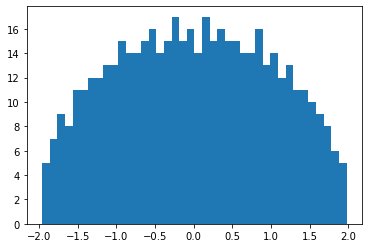

In [33]:
## Here's some starter code that draws a random V matrix and plots a histogram
## of its eigenvalues. Replace this code with what you actually want to do...

import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh  # Eigenvalue solver for Hermitian matrices

d = 500
A = np.random.randn(d,d) + 1j*np.random.randn(d,d)
V = 1/2/np.sqrt(d) * (A + A.T.conj())

E = eigvalsh(V)
plt.hist(E, bins=40)
plt.show() # The eigenvalues follow the Wigner-Dyson distribution, falling between [-2,2].